In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) =datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

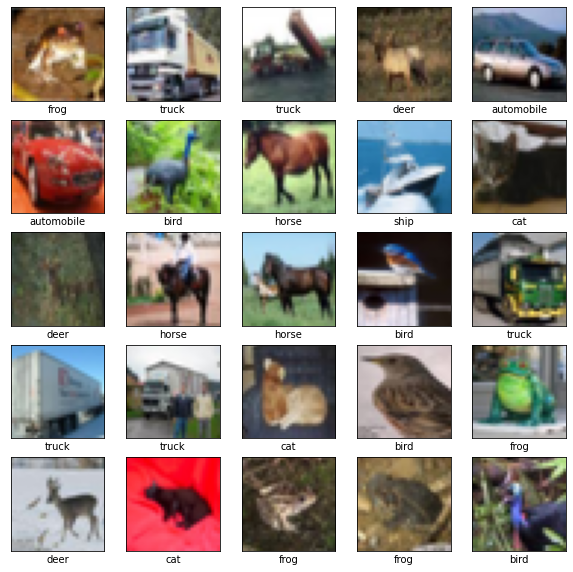

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5568 - accuracy: 0.4316 - val_loss: 1.3053 - val_accuracy: 0.5245
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1857 - accuracy: 0.5814 - val_loss: 1.1014 - val_accuracy: 0.6130
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0355 - accuracy: 0.6348 - val_loss: 1.0372 - val_accuracy: 0.6339
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9342 - accuracy: 0.6709 - val_loss: 0.9542 - val_accuracy: 0.6682
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8627 - accuracy: 0.6974 - val_loss: 0.8891 - val_accuracy: 0.6978
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8029 - accuracy: 0.7192 - val_loss: 0.8765 - val_accuracy: 0.6972
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7552 - accuracy: 0.7356 - val_loss: 0.9108 -

313/313 - 4s - loss: 0.8817 - accuracy: 0.7031 - 4s/epoch - 11ms/step
0.7031000256538391


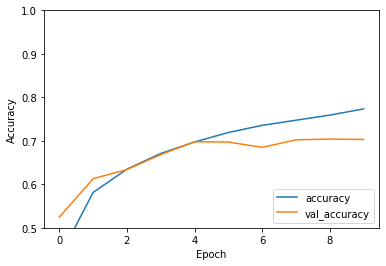

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print(test_acc)